In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pickle
import time

In [8]:
IMAGE_SIZE = 128
IMAGE_SHAPE = [IMAGE_SIZE, IMAGE_SIZE, 3]
vgg = VGG16(input_shape=IMAGE_SHAPE, weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
train_path = 'C:/Users/admin/Documents/Material/BTECH PROJECT/Dump/GINI/spotgarbage-GINI/spotgarbage/images'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',subset='training')
test_set = test_datagen.flow_from_directory(train_path,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = 16,
                                            class_mode = 'categorical',subset='validation')

Found 2454 images belonging to 2 classes.
Found 490 images belonging to 2 classes.


In [13]:
model_details=model.fit(training_set,batch_size=16, epochs = 30, validation_data=test_set, steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/30
154/154 [==============================] - 180s 1s/step - loss: 0.5464 - accuracy: 0.7152 - val_loss: 0.3474 - val_accuracy: 0.8408
Epoch 2/30
154/154 [==============================] - 83s 542ms/step - loss: 0.3139 - accuracy: 0.8574 - val_loss: 0.2794 - val_accuracy: 0.8857
Epoch 3/30
154/154 [==============================] - 86s 556ms/step - loss: 0.2573 - accuracy: 0.8899 - val_loss: 0.2872 - val_accuracy: 0.8755
Epoch 4/30
154/154 [==============================] - 85s 552ms/step - loss: 0.2389 - accuracy: 0.9077 - val_loss: 0.3464 - val_accuracy: 0.8612
Epoch 5/30
154/154 [==============================] - 85s 553ms/step - loss: 0.2573 - accuracy: 0.8985 - val_loss: 0.2396 - val_accuracy: 0.8939
Epoch 6/30
154/154 [==============================] - 86s 554ms/step - loss: 0.2165 - accuracy: 0.9159 - val_loss: 0.2057 - val_accuracy: 0.9143
Epoch 7/30
154/154 [==============================] - 85s 553ms/step - loss: 0.2144 - accuracy: 0.9120 - val_loss: 0.2039 - val_accu

In [14]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [15]:
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

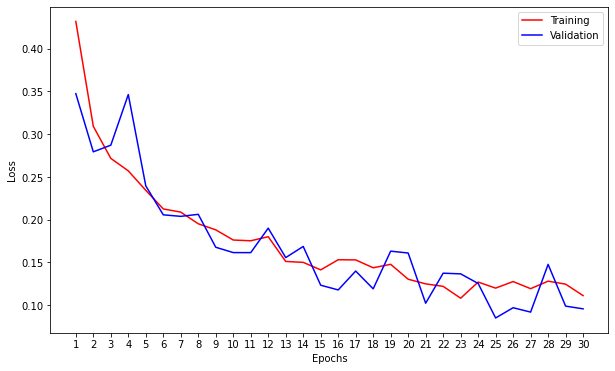

In [17]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

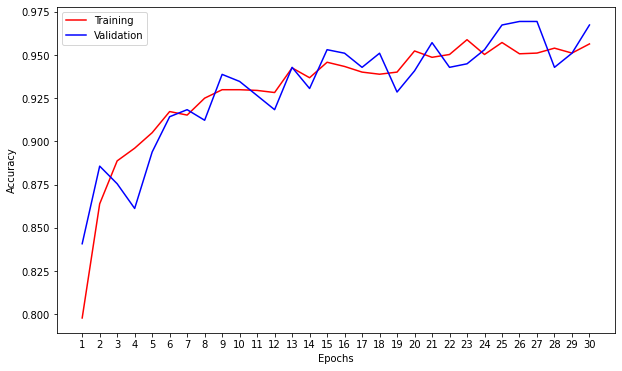

In [18]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [16]:
from IPython.display import Image
from keras.preprocessing import image
import tensorflow
img_path = 'C:/Users/Arpit/Desktop/Project/Datasets/sample-spotgarbage-GINI/spotgarbage/test/non-garbage-queried-images/0dbd00ae-9447-11e5-b59a-40f2e96c8ad8.jpg'
test_image = image.load_img(img_path, target_size = [128,128])
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0]>result[0][1]:
    print("Garbage")
else:
    print("Non-Garbage")

Non-Garbage


In [19]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
open("vgg16_dump.tflite", 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpge85a3hy\assets


58932924